In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.optimize import minimize
import yfinance as yf
import seaborn as sns
import module as rk

In [7]:
tickers = ['TATAMOTORS.NS','DABUR.NS','BAJAJ-AUTO.NS','BERGEPAINT.NS','HAVELLS.NS','HDFCBANK.NS','TORNTPHARM.NS','HINDUNILVR.NS','RELIANCE.NS','TITAN.NS']
data = yf.download(tickers, start='2010-6-2', end='2025-6-2') #fetching monthly data for 15 years
price_data=data['Close'] #taking the closing price to determine returns
returns = price_data[tickers].pct_change().dropna()
returns.dropna(inplace=True)
rets = pd.DataFrame(returns)

/tmp/ipython-input-1149310309.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2010-6-2', end='2025-6-2') #fetching monthly data for 15 years
[*********************100%***********************]  10 of 10 completed


In [8]:
rets.head()

Ticker,TATAMOTORS.NS,DABUR.NS,BAJAJ-AUTO.NS,BERGEPAINT.NS,HAVELLS.NS,HDFCBANK.NS,TORNTPHARM.NS,HINDUNILVR.NS,RELIANCE.NS,TITAN.NS
Date,,,,,,,,,,
2010-06-03,0.028278,0.009725,-0.003106,-0.011396,0.122336,0.028359,-0.004783,0.039117,0.019534,0.006574
2010-06-04,0.005670,0.029427,-0.006095,0.016571,-0.010437,-0.010443,0.005938,0.018822,0.000388,0.012973
2010-06-07,-0.044712,0.005458,-0.000366,-0.026931,-0.018318,-0.004799,-0.009123,-0.002583,-0.022741,-0.000178
2010-06-08,-0.001764,0.016542,0.004738,-0.010197,0.001454,-0.007434,0.001715,0.001394,-0.011262,-0.005871
2010-06-09,-0.010533,-0.024409,-0.000114,0.019132,-0.008228,0.009771,0.015138,-0.007359,0.010689,-0.004183


<Axes: xlabel='Date'>

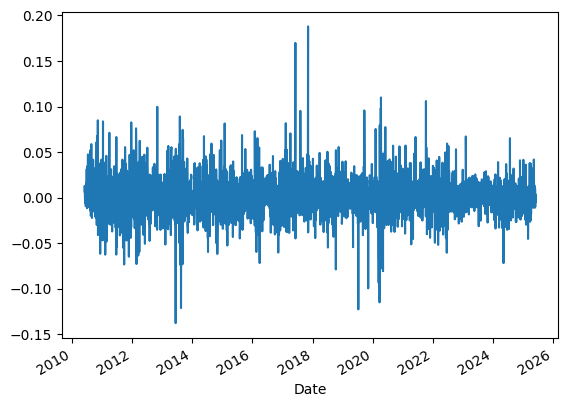

In [9]:
returns['TITAN.NS'].plot()

In [10]:
n_days = returns.shape[0]
return_per_day = (returns+1).prod()**(1/n_days) - 1
return_per_day

,0
Ticker,
TATAMOTORS.NS,0.000448
DABUR.NS,0.000483
BAJAJ-AUTO.NS,0.000658
BERGEPAINT.NS,0.000922
HAVELLS.NS,0.000923
HDFCBANK.NS,0.000687
TORNTPHARM.NS,0.000897
HINDUNILVR.NS,0.000689
RELIANCE.NS,0.000520


In [11]:
annualized_return = (returns+1).prod()**(252/n_days) - 1
annualized_return

,0
Ticker,
TATAMOTORS.NS,0.119363
DABUR.NS,0.129416
BAJAJ-AUTO.NS,0.180296
BERGEPAINT.NS,0.261489
HAVELLS.NS,0.261844
HDFCBANK.NS,0.188990
TORNTPHARM.NS,0.253375
HINDUNILVR.NS,0.189500
RELIANCE.NS,0.139879


In [51]:
print("Tickers", '\t ',"Max Drawdown", '\t\t',"Max Drawdown Date")
print("************************************************************")
for i in tickers :
  print(i, '\t', rk.drawdown(rets[i])['Drawdown'].min(), '\t', rk.drawdown(rets[i])['Drawdown'].idxmin())

Tickers 	  Max Drawdown 		 Max Drawdown Date
************************************************************
TATAMOTORS.NS 	 -0.890782995065061 	 2020-04-03 00:00:00
DABUR.NS 	 -0.32029890966339314 	 2025-04-07 00:00:00
BAJAJ-AUTO.NS 	 -0.42313525480802044 	 2025-04-07 00:00:00
BERGEPAINT.NS 	 -0.3765482759812847 	 2024-12-26 00:00:00
HAVELLS.NS 	 -0.4142760735393968 	 2020-05-22 00:00:00
HDFCBANK.NS 	 -0.4105497869008348 	 2020-03-24 00:00:00
TORNTPHARM.NS 	 -0.3070031902300835 	 2017-06-28 00:00:00
HINDUNILVR.NS 	 -0.3045579159399061 	 2022-03-07 00:00:00
RELIANCE.NS 	 -0.45088351545166894 	 2020-03-23 00:00:00
TITAN.NS 	 -0.4173002291915732 	 2020-03-23 00:00:00


In [52]:
rk.skewness(rets).sort_values()

,0
Ticker,
BAJAJ-AUTO.NS,-0.024485
HDFCBANK.NS,0.016251
DABUR.NS,0.135098
HAVELLS.NS,0.245578
RELIANCE.NS,0.278936
TORNTPHARM.NS,0.282937
TITAN.NS,0.346304
TATAMOTORS.NS,0.397147
BERGEPAINT.NS,0.546980


In [14]:
rk.kurtosis(rets).sort_values()

,0
Ticker,
DABUR.NS,6.410440
HAVELLS.NS,6.992109
BERGEPAINT.NS,7.094899
TORNTPHARM.NS,8.362867
BAJAJ-AUTO.NS,8.872884
TATAMOTORS.NS,8.960332
RELIANCE.NS,9.229389
HDFCBANK.NS,9.930807
TITAN.NS,10.302636


In [15]:
rk.semideviation(rets).sort_values()

,0
Ticker,
HINDUNILVR.NS,0.008757
DABUR.NS,0.009729
HDFCBANK.NS,0.010110
BAJAJ-AUTO.NS,0.010992
TORNTPHARM.NS,0.011196
RELIANCE.NS,0.011207
BERGEPAINT.NS,0.012292
HAVELLS.NS,0.012996
TITAN.NS,0.013817


In [16]:
rk.sharpe_ratio(rets).sort_values()

,0
Ticker,
TATAMOTORS.NS,0.215441
RELIANCE.NS,0.390686
DABUR.NS,0.406152
BAJAJ-AUTO.NS,0.566465
HDFCBANK.NS,0.665237
HINDUNILVR.NS,0.665730
HAVELLS.NS,0.715795
BERGEPAINT.NS,0.722455
TITAN.NS,0.737088


In [17]:
rk.var_historic(rets, level=5)

,0
Ticker,
TATAMOTORS.NS,0.036953
DABUR.NS,0.022326
BAJAJ-AUTO.NS,0.023617
BERGEPAINT.NS,0.029043
HAVELLS.NS,0.028573
HDFCBANK.NS,0.020967
TORNTPHARM.NS,0.024248
HINDUNILVR.NS,0.020329
RELIANCE.NS,0.025035


In [53]:
rk.var_gaussian(rets)

,0
Ticker,
TATAMOTORS.NS,0.040954
DABUR.NS,0.024028
BAJAJ-AUTO.NS,0.025900
BERGEPAINT.NS,0.031120
HAVELLS.NS,0.031463
HDFCBANK.NS,0.023248
TORNTPHARM.NS,0.027569
HINDUNILVR.NS,0.023306
RELIANCE.NS,0.027624


<Axes: title={'center': 'Hedge Fund Indices: VaR at 5%'}, xlabel='Ticker'>

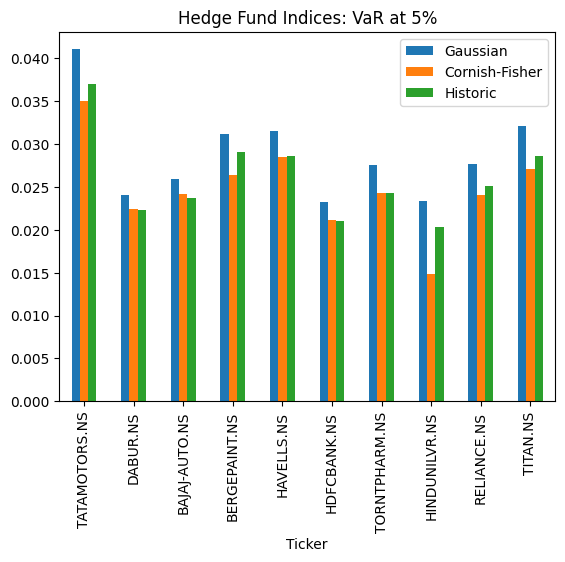

In [54]:
var_table = [rk.var_gaussian(rets),
             rk.var_gaussian(rets, modified=True),
             rk.var_historic(rets)]
comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
comparison.plot.bar(title="Hedge Fund Indices: VaR at 5%")

In [20]:
rk.sharpe_ratio(rets, 0.03).sort_values()

,0
Ticker,
TATAMOTORS.NS,0.215441
RELIANCE.NS,0.390686
DABUR.NS,0.406152
BAJAJ-AUTO.NS,0.566465
HDFCBANK.NS,0.665237
HINDUNILVR.NS,0.665730
HAVELLS.NS,0.715795
BERGEPAINT.NS,0.722455
TITAN.NS,0.737088


<Axes: title={'center': 'Industry Sharpe Ratios'}, xlabel='Ticker'>

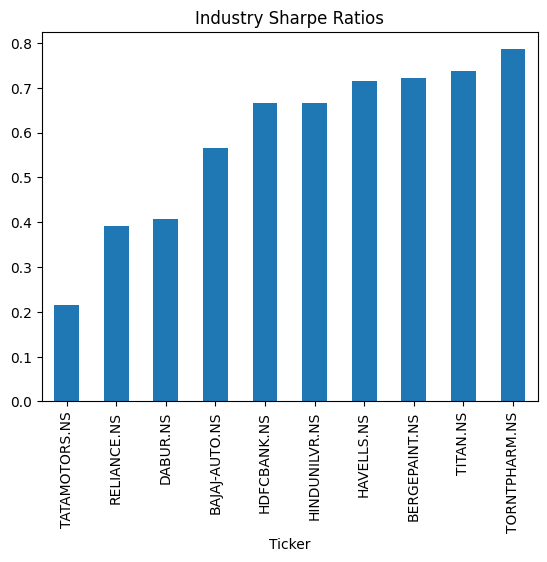

In [55]:
rk.sharpe_ratio(rets, 0.03).sort_values().plot.bar(title='Industry Sharpe Ratios')

In [56]:
expected_returns=rk.annualized_return(rets)
expected_returns

,0
Ticker,
TATAMOTORS.NS,0.119363
DABUR.NS,0.129416
BAJAJ-AUTO.NS,0.180296
BERGEPAINT.NS,0.261489
HAVELLS.NS,0.261844
HDFCBANK.NS,0.188990
TORNTPHARM.NS,0.253375
HINDUNILVR.NS,0.189500
RELIANCE.NS,0.139879


<Axes: xlabel='Ticker'>

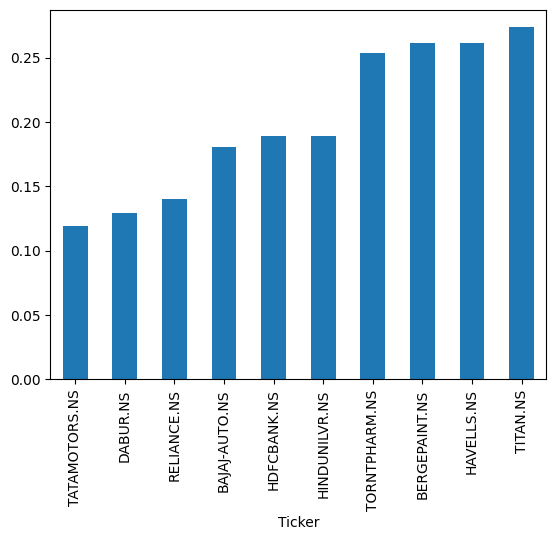

In [57]:
expected_returns.sort_values().plot.bar()

In [24]:
cov_matrix = rets.cov() #to get covariance between the assets
cov_matrix.head()

Ticker,TATAMOTORS.NS,DABUR.NS,BAJAJ-AUTO.NS,BERGEPAINT.NS,HAVELLS.NS,HDFCBANK.NS,TORNTPHARM.NS,HINDUNILVR.NS,RELIANCE.NS,TITAN.NS
Ticker,,,,,,,,,,
TATAMOTORS.NS,0.000644,0.000085,0.000141,0.000101,0.000161,0.000127,0.000076,0.000059,0.000160,0.000164
DABUR.NS,0.000085,0.000224,0.000053,0.000069,0.000070,0.000043,0.000050,0.000084,0.000058,0.000072
BAJAJ-AUTO.NS,0.000141,0.000053,0.000263,0.000064,0.000092,0.000081,0.000046,0.000054,0.000086,0.000091
BERGEPAINT.NS,0.000101,0.000069,0.000064,0.000384,0.000101,0.000063,0.000057,0.000063,0.000077,0.000090
HAVELLS.NS,0.000161,0.000070,0.000092,0.000101,0.000392,0.000088,0.000054,0.000053,0.000094,0.000108


In [58]:
ew=np.repeat(0.10, 10)
r=rk.portfolio_return(ew, expected_returns)

In [26]:
vol=rk.portfolio_vol(ew, cov_matrix) #Naive- weights

**Maximum Sharpe Ratio Strategy**

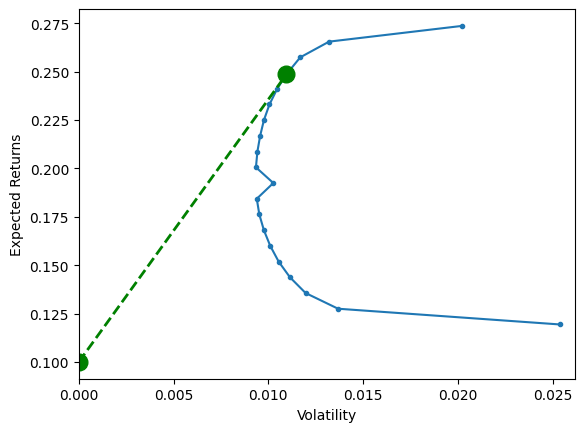

In [59]:
# plot EF
er=expected_returns
cov=cov_matrix
ax = rk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)
ax.set_ylabel('Expected Returns')
ax.set_xlabel('Volatility')
# get MSR
rf = 0.1
w_msr = rk.msr(rf, er, cov)
r_msr = rk.portfolio_return(w_msr, er)
vol_msr =rk.portfolio_vol(w_msr, cov)
# add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

In [28]:
rk.msr(0.1, np.array(er), cov) #weights allocated t each asset

array([8.24702042e-14, 1.43387906e-14, 0.00000000e+00, 1.80024462e-01,
       1.66630371e-01, 5.81516402e-02, 2.88116000e-01, 1.21011007e-01,
       1.81167879e-14, 1.86066519e-01])

**Global Minimum Volatility strategy**

<Axes: xlabel='Volatility'>

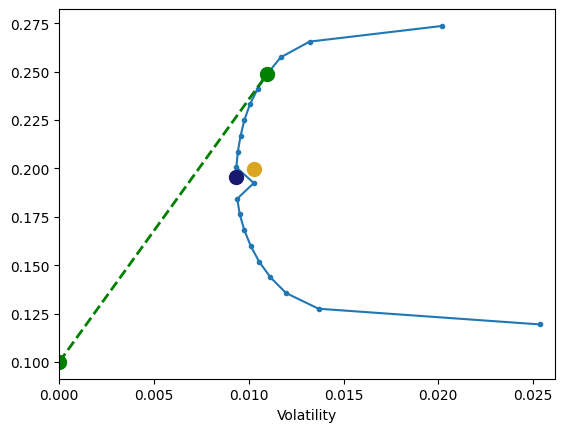

In [60]:
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

**Comparing the strategies**

In [30]:
ann_rets = pd.Series(rk.annualized_return(rets))

In [31]:
#calculating weights to optimize for the maximum sharpe ratio using msr function from the risk module
weights_gmv=rk.gmv(cov_matrix)
#return of the optimized portfolio
r_gmv=rk.portfolio_return(weights_gmv,ann_rets)
#volatility of the optimized portfolio
vol_gmv=rk.portfolio_vol(weights_gmv,cov_matrix)

In [32]:
#calculating weights to optimize for the maximum sharpe ratio using msr function from the risk module
weights=rk.msr(0.03,ann_rets, cov_matrix)
#return of the optimized portfolio
r=rk.portfolio_return(weights,ann_rets)
#volatility of the optimized portfolio
vol=rk.portfolio_vol(weights,cov_matrix)

In [33]:
sharpe = (r-0.03)/vol
print(f"The return of the portfolio is {r*100}%")
print(f"The volatility of the portfolio is {vol*100}%")
print(f"The Sharpe Ratio of the portfolio is {sharpe}")

The return of the portfolio is 23.61545246155447%
The volatility of the portfolio is 1.0194541063554783%
The Sharpe Ratio of the portfolio is 20.22205053963064


In [61]:
sharpe_gmv = (r_gmv-0.03)/vol_gmv
print(f"The return of the gmv portfolio is {r_gmv*100}%")
print(f"The volatility of the gmv portfolio is {vol_gmv*100}%")
print(f"The Sharpe Ratio of the gmv portfolio is {sharpe_gmv}")

The return of the gmv portfolio is 19.555823440002765%
The volatility of the gmv portfolio is 0.9321013039690345%
The Sharpe Ratio of the gmv portfolio is 17.761828429490933


**Assets Allocation according to MAximum Sharpe ratio strategy**

In [62]:
data=np.array(rk.gmv(cov))

[]

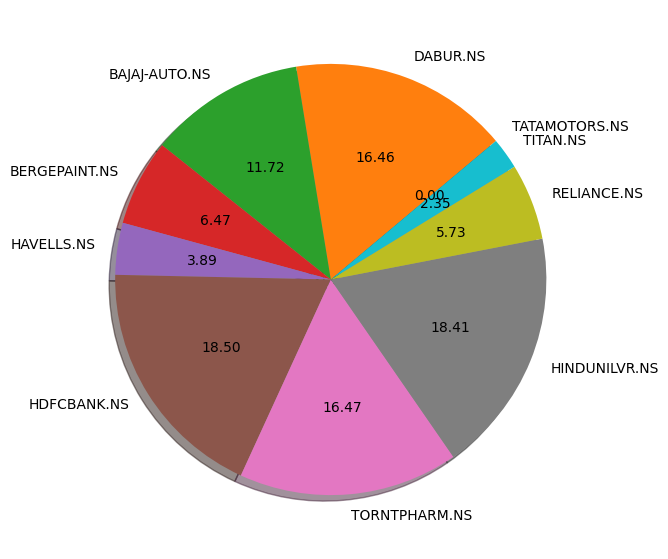

In [63]:
def func(pct, data):
    absolute = (pct / 100.*np.sum(data))
    return "{:.2f}".format(pct)
fig, ax = plt.subplots(figsize=(10, 7))

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  labels=tickers,
                                  shadow=True,
                                  startangle=40)

ax.plot()

**Assets Allocation according to Global Minimum Volatility strategy**

In [37]:
data=np.array(weights)

[]

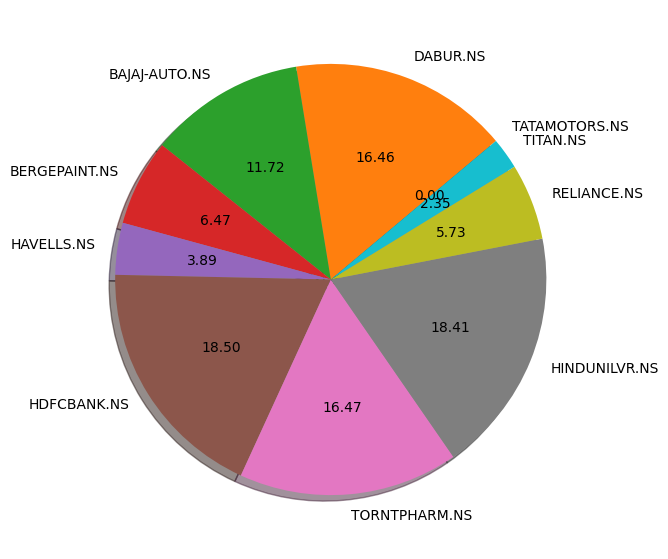

In [64]:
def func(pct, data):
    absolute = (pct / 100.*np.sum(data))
    return "{:.2f}".format(pct)
fig, ax = plt.subplots(figsize=(10, 7))

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  labels=tickers,
                                  shadow=True,
                                  startangle=40)

ax.plot()

**Implementing CPPI Strategy**

In [65]:
#Taking the same 10 assets as risky assets and using them as risky assets in CPPI
df = rk.run_cppi( rets,safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03, drawdown=None)

<Axes: title={'center': 'TITAN.NS'}, xlabel='Date'>

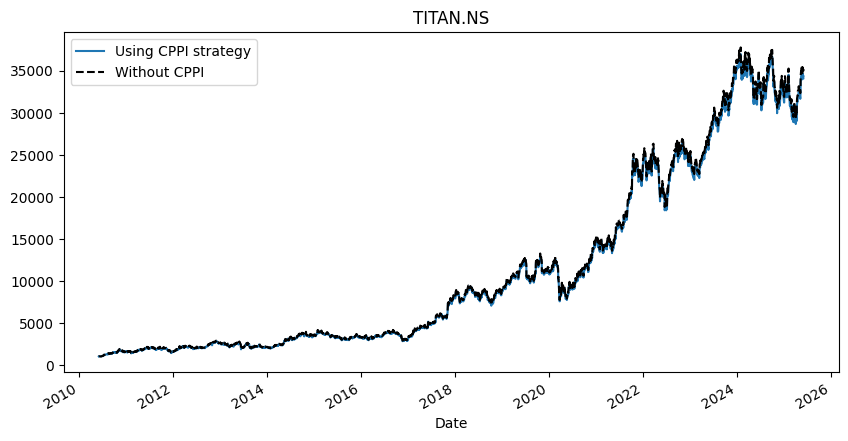

In [66]:
#Comparing returns of Titan
ax = df["Wealth"]['TITAN.NS'].plot(title="TITAN.NS",label="Using CPPI strategy",legend=True, figsize=(10, 5))
df["Risky Wealth"]['TITAN.NS'].plot(label="Without CPPI",ax = ax, style="k--", legend=True)

<Axes: title={'center': 'HDFCBANK.NS'}, xlabel='Date'>

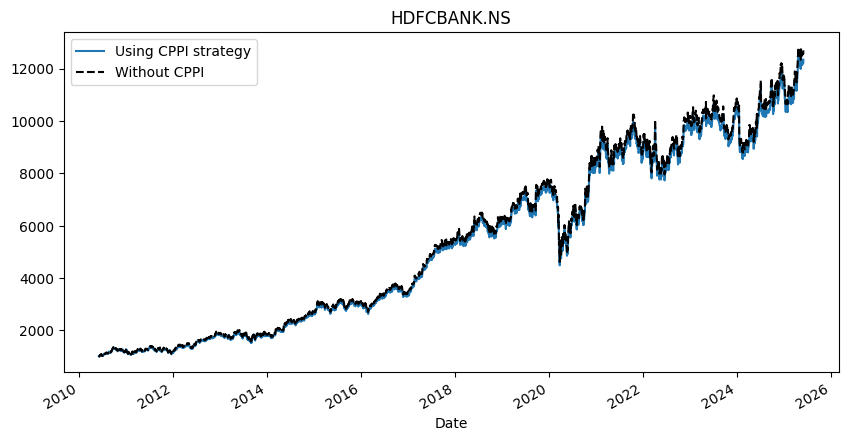

In [67]:
ax = df["Wealth"]['HDFCBANK.NS'].plot(title="HDFCBANK.NS",label="Using CPPI strategy",legend=True, figsize=(10, 5))
df["Risky Wealth"]['HDFCBANK.NS'].plot(label="Without CPPI",ax = ax, style="k--", legend=True)

<Axes: title={'center': 'TATAMOTORS.NS'}, xlabel='Date'>

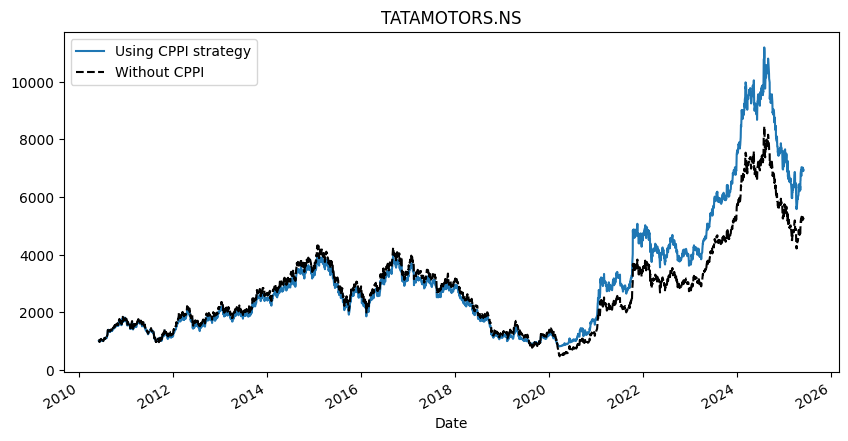

In [68]:
ax = df["Wealth"]['TATAMOTORS.NS'].plot(title="TATAMOTORS.NS",label="Using CPPI strategy",legend=True, figsize=(10, 5))
df["Risky Wealth"]['TATAMOTORS.NS'].plot(label="Without CPPI",ax = ax, style="k--", legend=True)

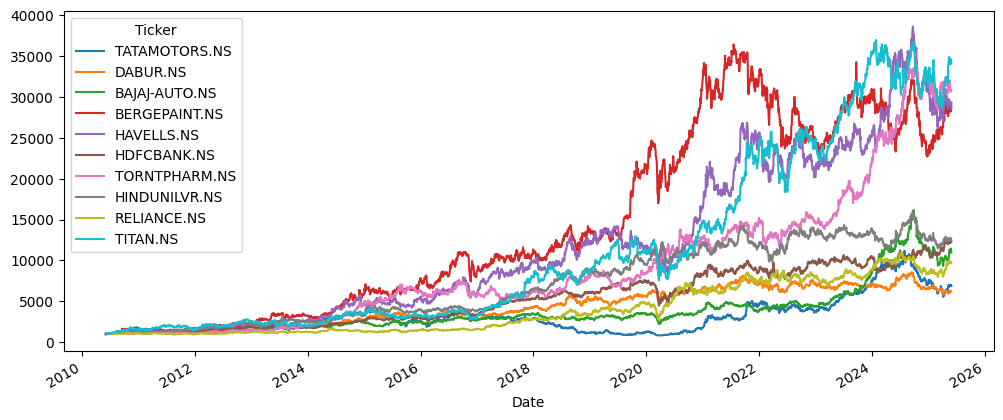

In [69]:
# plotting the wealth index after running cppi
ax = df["Wealth"].plot(figsize=(12,5))

<Axes: xlabel='Date'>

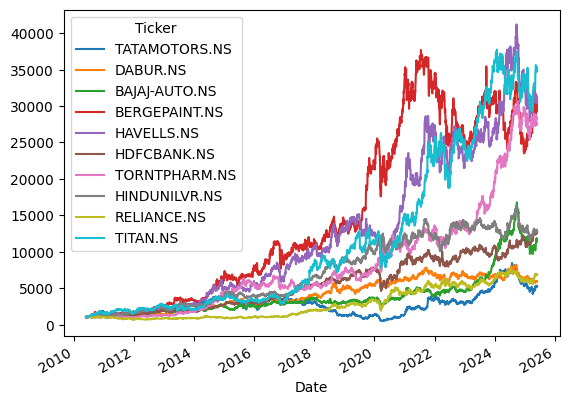

In [70]:
#plotting returns if all the initial amount was placed in the risky asset
df["Risky Wealth"].plot()

In [71]:
#calculating the return series for the portfolio where cppi was used
cppi_rets = df["Wealth"].pct_change().dropna()

In [72]:
#performance of the portfolio
cppi_summary = rk.summary_stats(cppi_rets)
display(cppi_summary)

,Ticker,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Sharpe Ratio
0,TATAMOTORS.NS,0.139591,0.368076,0.238935,8.076648,0.033372,0.297739
1,DABUR.NS,0.132045,0.234125,0.129430,6.586311,0.022040,0.435857
2,BAJAJ-AUTO.NS,0.177534,0.256856,-0.031785,8.940603,0.024037,0.574384
3,BERGEPAINT.NS,0.259131,0.310034,0.546240,7.155698,0.026237,0.739049
4,HAVELLS.NS,0.250245,0.311210,0.173356,6.754534,0.028701,0.707705
5,HDFCBANK.NS,0.185262,0.230575,0.007261,10.099128,0.020997,0.673367
6,TORNTPHARM.NS,0.263166,0.272471,0.279698,8.683153,0.023796,0.855746
7,HINDUNILVR.NS,0.185902,0.231745,1.181763,14.256104,0.014625,0.672730
8,RELIANCE.NS,0.166835,0.261354,0.296440,10.478357,0.022431,0.523560
9,TITAN.NS,0.271378,0.320636,0.345529,10.326679,0.027047,0.752812
